In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
import requests
from datetime import datetime
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [69]:
# Import API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | noumea
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | osypenko
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | toktogul
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | aguimes
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | cabedelo
Processing Record 17 of Set 1 | krasnoselkup
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | sioux lookout
Processing Record 21 of Set 1 | cape town
Proce

Processing Record 38 of Set 4 | leshukonskoye
Processing Record 39 of Set 4 | richards bay
Processing Record 40 of Set 4 | maumere
Processing Record 41 of Set 4 | chumikan
Processing Record 42 of Set 4 | beloha
Processing Record 43 of Set 4 | qaanaaq
Processing Record 44 of Set 4 | ponta delgada
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | muncie
Processing Record 48 of Set 4 | singleton
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | samarai
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | nha trang
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | viedma
Processing Record 5 of Set 5 | paita
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | hasaki
Processing Record 8 of Set 5 | boyolangu
Processing Record 9 of Set 5 | ushtobe
Processing Record 10 of Set 5 | longyearbyen
Processing Record 11 of Set

Processing Record 26 of Set 8 | mountain home
Processing Record 27 of Set 8 | goderich
Processing Record 28 of Set 8 | mahanoro
Processing Record 29 of Set 8 | joshimath
Processing Record 30 of Set 8 | develi
Processing Record 31 of Set 8 | margherita
Processing Record 32 of Set 8 | hervey bay
Processing Record 33 of Set 8 | bubaque
Processing Record 34 of Set 8 | tromso
Processing Record 35 of Set 8 | gurmatkal
Processing Record 36 of Set 8 | luganville
Processing Record 37 of Set 8 | bengkalis
City not found. Skipping...
Processing Record 38 of Set 8 | tupiza
Processing Record 39 of Set 8 | fereydunshahr
Processing Record 40 of Set 8 | shikhazany
Processing Record 41 of Set 8 | asgabat
Processing Record 42 of Set 8 | padang
Processing Record 43 of Set 8 | chernyshevskiy
Processing Record 44 of Set 8 | bar harbor
Processing Record 45 of Set 8 | nouadhibou
Processing Record 46 of Set 8 | bull savanna
Processing Record 47 of Set 8 | acapulco
Processing Record 48 of Set 8 | nanortalik
Pr

Processing Record 14 of Set 12 | behshahr
Processing Record 15 of Set 12 | san carlos del zulia
Processing Record 16 of Set 12 | sept-iles
Processing Record 17 of Set 12 | ust-koksa
Processing Record 18 of Set 12 | koumac
Processing Record 19 of Set 12 | mossendjo
Processing Record 20 of Set 12 | banda aceh
Processing Record 21 of Set 12 | barawe
City not found. Skipping...
Processing Record 22 of Set 12 | tyup
Processing Record 23 of Set 12 | qandala
Processing Record 24 of Set 12 | jambi
Processing Record 25 of Set 12 | rocha
Processing Record 26 of Set 12 | kenai
Processing Record 27 of Set 12 | lerwick
Processing Record 28 of Set 12 | matucana
Processing Record 29 of Set 12 | batagay-alyta
Processing Record 30 of Set 12 | juiz de fora
Processing Record 31 of Set 12 | auchi
Processing Record 32 of Set 12 | seoul
Processing Record 33 of Set 12 | hualmay
Processing Record 34 of Set 12 | mindelo
Processing Record 35 of Set 12 | podosinovets
Processing Record 36 of Set 12 | pangody
Proc

In [70]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,53.24,86,90,0.00,US,2021-10-30 22:37:58
1,Tasiilaq,65.6145,-37.6368,24.96,65,93,4.41,GL,2021-10-30 22:40:30
2,Punta Arenas,-53.1500,-70.9167,53.71,43,0,14.97,CL,2021-10-30 22:40:36
3,Hobart,-42.8794,147.3294,59.25,56,75,3.00,AU,2021-10-30 22:39:11
4,Noumea,-22.2763,166.4572,80.58,99,3,6.35,NC,2021-10-30 22:40:51
5,Port Lincoln,-34.7333,135.8667,60.01,61,0,12.17,AU,2021-10-30 22:42:38
6,Busselton,-33.6500,115.3333,53.58,83,95,4.29,AU,2021-10-30 22:40:31
7,Hermanus,-34.4187,19.2345,61.90,89,48,8.39,ZA,2021-10-30 22:42:38
8,Osypenko,46.9136,36.8253,45.84,79,0,12.24,UA,2021-10-30 22:42:39
9,Avarua,-21.2078,-159.7750,77.05,57,98,13.80,CK,2021-10-30 22:42:39


In [74]:
new_column_order = ["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,42.0970,-79.2353,53.24,86,90,0.00
1,Tasiilaq,GL,65.6145,-37.6368,24.96,65,93,4.41
2,Punta Arenas,CL,-53.1500,-70.9167,53.71,43,0,14.97
3,Hobart,AU,-42.8794,147.3294,59.25,56,75,3.00
4,Noumea,NC,-22.2763,166.4572,80.58,99,3,6.35
5,Port Lincoln,AU,-34.7333,135.8667,60.01,61,0,12.17
6,Busselton,AU,-33.6500,115.3333,53.58,83,95,4.29
7,Hermanus,ZA,-34.4187,19.2345,61.90,89,48,8.39
8,Osypenko,UA,46.9136,36.8253,45.84,79,0,12.24
9,Avarua,CK,-21.2078,-159.7750,77.05,57,98,13.80


In [75]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [76]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

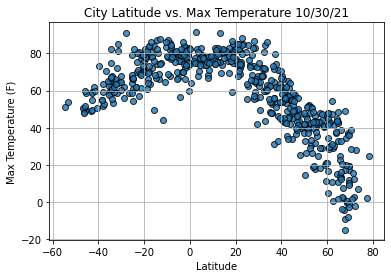

In [77]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

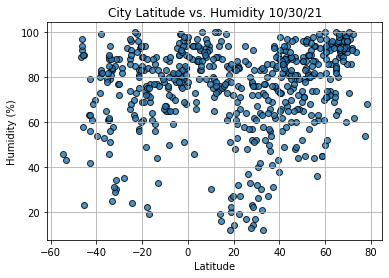

In [78]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

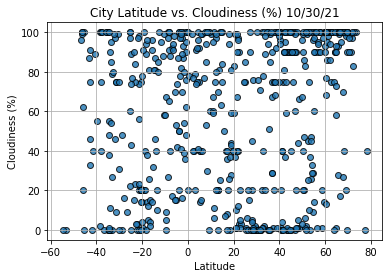

In [79]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

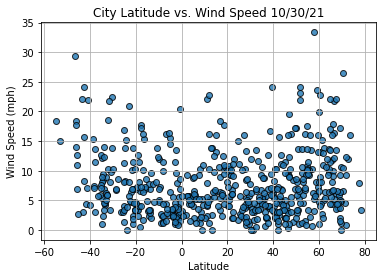

In [80]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [82]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [83]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,42.0970,-79.2353,53.24,86,90,0.00
1,Tasiilaq,GL,65.6145,-37.6368,24.96,65,93,4.41
8,Osypenko,UA,46.9136,36.8253,45.84,79,0,12.24
10,Toktogul,KG,41.8708,72.9402,44.47,49,100,2.86
11,San Patricio,US,28.0170,-97.5169,86.41,23,0,5.32


In [84]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

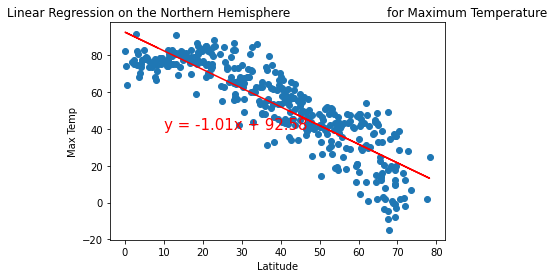

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

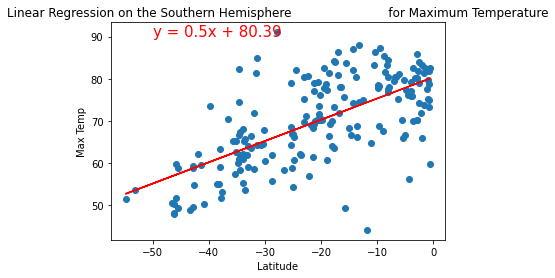

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

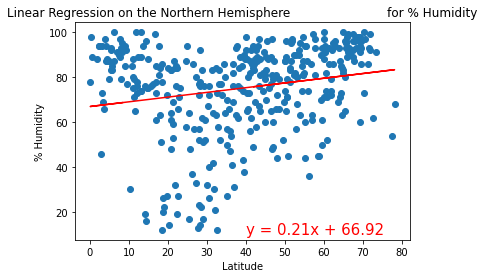

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


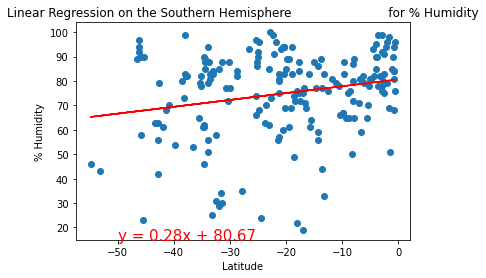

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

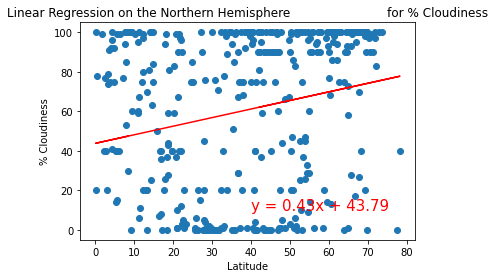

In [93]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

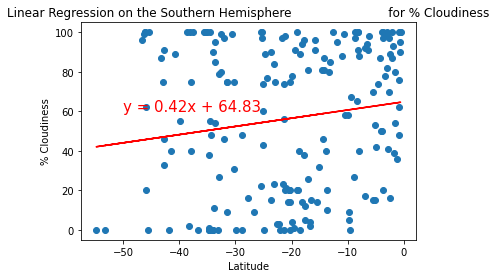

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

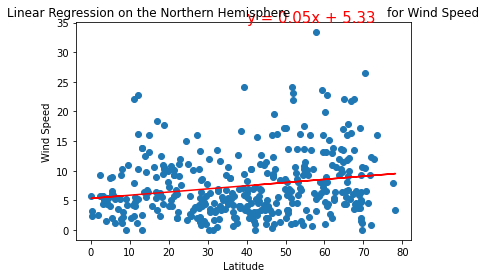

In [95]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

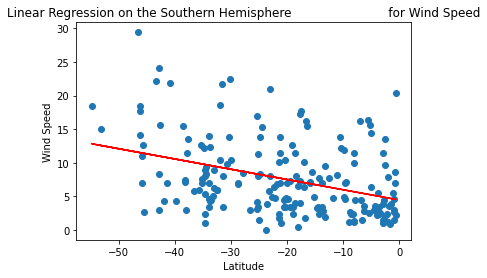

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))